In [1]:
import numpy as np
from sklearn.datasets import make_blobs
import pandas as pd
from scipy.spatial.distance import cdist
%matplotlib inline

In [147]:
blobs = make_blobs(n_samples=1000, n_features=2, centers=5, random_state=42)

In [148]:
X = blobs[0]
y= blobs[1]

In [149]:
feature_names = ['feature_'+str(i) for i in range(X.shape[1])]


In [150]:
blobs_df = pd.DataFrame(X, columns = feature_names)
blobs_df['class'] = y

In [151]:
blobs_df.head()

,feature_0,feature_1,class
0,5.020077,2.583755,1
1,3.232367,1.195353,1
2,-6.107928,-9.728652,2
3,5.199669,3.053950,1
4,1.380819,4.593374,4


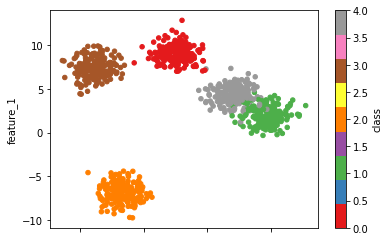

In [152]:
blobs_df.plot.scatter(x='feature_0', y='feature_1', c='class', cmap='Set1')

In [153]:
dists = cdist(X, X)

In [154]:
np.fill_diagonal(dists, np.nan)

In [155]:
clusters = list(range(len(X)))

In [156]:
max_dist = dists.max()

In [157]:
flat_dists = dists.flatten()

In [158]:
flat_dists.sort()

In [159]:
flat_dists

array([ 0.00352609,  0.00352609,  0.01098145, ...,         nan,
               nan,         nan])

In [160]:
#every pairwise distance between points will appear twice (a->b, b->a). 
#This removes the doubles but preserves any cases where the same distance incidentally occures
flat_length = len(flat_dists)
flat_length = range(len(flat_dists))
flat_length = list(flat_length)[0::2]
flat_dists = flat_dists[flat_length]
flat_dists = flat_dists[~np.isnan(flat_dists)]
flat_dists

array([  3.52609495e-03,   1.09814508e-02,   1.11008756e-02, ...,
         2.28415650e+01,   2.29670954e+01,   2.29746638e+01])

In [161]:
for X_i in np.where(dists==flat_dists[0]):
    print(X_i[0])
    print(X_i[1])

452
815
815
452


In [162]:
temp_index[0][1]

4

In [163]:
class HierarchicalClusterScratch():
    def __init__(self):
        self.dist_matrix = None # holds distance matrix
        self.dist_queue = None # holds flattened distance matrix, used as a queue for clustering
        self.cluster_hist = None # holds the history of cluster assignment

    def fit(self, X):
        # instantiate some things
        self.__init_dists(X) # distances
        
#         print(self.dist_matrix)
#         print(self.dist_queue)
        
        working_clusters = list(range(len(X))) # each entry in X is assigned a unique cluster 
        self.cluster_hist = [] # cluster history
        self.cluster_hist.append(working_clusters.copy()) #store original state in cluster_history
        
#         print(self.dist_queue)
        
        for dist_i in self.dist_queue:
            # check if all assigned clusters are the same
            if len(set(working_clusters)) == 1:
                break
            
            #identify the observation in X that have dist_i.
            # Take every other entry since you will get [2,4] and [4,2] 
            # but want to be robust against cases were multiple distances have the same value
            indexes_to_be_clustered = np.where(self.dist_matrix==dist_i)[0::2] 
            # I expect the np.where is causing speed issues at scale
            
            for X_i in indexes_to_be_clustered:
#                 print(working_clusters)
#                 print(X_i)
                obs_a = X_i[0]
                obs_b = X_i[1]
                
                cluster_a = working_clusters[obs_a]
                cluster_b = working_clusters[obs_b]
                
                count_a = working_clusters.count(cluster_a)
                count_b = working_clusters.count(cluster_b)
                
                # group smaller cluster into the larger. 
                # If they are of equal size, group cluster_a into cluster_b
                if count_a > count_b:
                    working_clusters[obs_b] = cluster_a
                else:
                    working_clusters[obs_a] = cluster_b
                self.cluster_hist.append(working_clusters.copy())      

        
    def __init_dists(self, X):
        # set distance matrix
        tmp_dist = cdist(X, X)
        np.fill_diagonal(tmp_dist, np.nan) #np.fill_diagonal works IN PLACE
        self.dist_matrix = tmp_dist.copy()
        
        # set flat_dist
        flat_dists = dists.flatten() #flatten
        flat_dists.sort() # sort in place
        
        #every pairwise distance between points will appear twice (a->b, b->a). 
        #This removes the doubles but preserves any cases where the same distance incidentally occures
        flat_length = len(flat_dists)
        flat_length = range(len(flat_dists))
        flat_length = list(flat_length)[0::2]
        flat_dists = flat_dists[flat_length]
        
        flat_dists = flat_dists[~np.isnan(flat_dists)] # remove np.nans 
        self.dist_queue = flat_dists # should i use list?
        


In [164]:
hc_scratch = HierarchicalClusterScratch()

In [165]:
hc_scratch.fit(X)

KeyboardInterrupt: 

In [ ]:
history = hc_scratch.cluster_hist

In [ ]:
history

In [ ]:
%%timeit
hc_scratch = HierarchicalClusterScratch()
hc_scratch.fit(X)

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
%%timeit
hc_sklearn = AgglomerativeClustering()
hc_sklearn.fit(X)